In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf

import time
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Nadam

from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout, Add, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.losses import Huber
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.regularizers import l1_l2

from sklearn.metrics import (mean_squared_error,
                           r2_score,
                           mean_absolute_error,
                           explained_variance_score)

from tensorflow.keras.layers import (Dense, Dropout, BatchNormalization,
                                   Input, Concatenate, Reshape, Conv1D,
                                   MaxPooling1D, Flatten, MultiHeadAttention,
                                   LayerNormalization, GlobalAveragePooling1D,
                                   Embedding, Add, Attention)

from tensorflow.keras.callbacks import (EarlyStopping, ReduceLROnPlateau,
                                      ModelCheckpoint)

In [49]:
data = pd.read_excel('1390_train_data.xlsx')

In [50]:
data[data<0] = 0
df = pd.DataFrame(data)
df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMF,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%)
0,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,5.200
1,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,4.828
2,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,4.836
3,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,5.070
4,0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.8,0.2,0.0,2.7,1.0,6,8,1,2,4.980


In [51]:
print(df.isnull().sum())

Additive concentration    0
MAI                       0
FAI                       0
CsI                       0
CsBr                      0
MABr                      0
MACl                      0
PbI2                      0
PbBr2                     0
PbCl2                     0
SnI2                      0
SnCl2                     0
SnBr2                     0
Pb(SCN)2                  0
SnF2                      0
DMF                       0
DMSO                      0
GBL                       0
Polarity index            0
Annealing tem             0
Etl                       0
Htl                       0
Back contact              0
Interlayer                0
PCE (%)                   0
dtype: int64


In [52]:
X_train = df.drop(['PCE (%)'], axis= 1)
y_train = df['PCE (%)']
print(X_train.shape, y_train.shape)

(1390, 24) (1390,)


In [53]:
test_data = pd.read_excel('151_test_data.xlsx')
test_df = pd.DataFrame(test_data)
test_df.head()

,Additive concentration,MAI,FAI,CsI,CsBr,MABr,MACl,PbI2,PbBr2,PbCl2,...,DMSO,GBL,Polarity index,Annealing tem,Etl,Htl,Back contact,Interlayer,PCE (%),ref
0,0,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,16.23,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
1,2,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,17.14,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
2,4,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,18.22,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
3,5,1.47,0.0,0.0,0.0,0.0,0.0,1.47,0.0,0.0,...,0.12,0.0,2.4,1.0,2,4,0,0,16.80,"Dual-Functional 3-Acetyl-2,5-dimethylthiophene..."
4,0,2.00,0.0,0.0,0.0,0.0,0.0,0.50,0.0,0.5,...,0.00,0.0,0.0,1.1,3,8,2,0,14.00,3-Thiophenemalonic Acid Additive Enhanced Perf...


In [54]:
X_test = test_df.drop(['PCE (%)', 'ref'], axis= 1)
y_test = test_df['PCE (%)']
print(X_test.shape, y_test.shape)

(151, 24) (151,)


In [55]:
np.random.seed(42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
def r_squared(y_true, y_pred):
    SS_res = K.sum(K.square(y_true - y_pred))
    SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
    return (1 - SS_res/(SS_tot + K.epsilon()))

# hyperparameter tuning for Random forest (1390 datapoints)

In [57]:
# RANDOM FOREST


best_classic_models = {}
classic_results = {}

start_time = time.time()

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=0
)
rf_grid.fit(X_train_scaled, y_train)
best_rf = rf_grid.best_estimator_

training_time = time.time() - start_time
print(f"Tuning completed in {training_time:.2f} seconds")


print("RANDOM FOREST - HYPERPARAMETER TUNING RESULTS")

print("\n Best Parameters:")
for param, value in rf_grid.best_params_.items():
    print(f"   {param}: {value}")

print(f"\n Best CV Score (Negative MSE): {rf_grid.best_score_:.4f}")
print(f"   Best CV RMSE: {np.sqrt(-rf_grid.best_score_):.4f}")

y_train_pred = best_rf.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

print("\n Training Set Performance:")
print(f"   RMSE: {train_rmse:.4f}")
print(f"   MAE:  {train_mae:.4f}")
print(f"   R²:   {train_r2:.4f}")

y_test_pred = best_rf.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("\n Test Set Performance:")
print(f"   RMSE: {test_rmse:.4f}")
print(f"   MAE:  {test_mae:.4f}")
print(f"   R²:   {test_r2:.4f}")

print("COMPARISON WITH DEFAULT MODEL (No Tuning)")

rf_default = RandomForestRegressor(random_state=42)
rf_default.fit(X_train_scaled, y_train)

y_test_pred_default = rf_default.predict(X_test_scaled)
default_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_default))
default_r2 = r2_score(y_test, y_test_pred_default)
default_mae = mean_absolute_error(y_test, y_test_pred_default)

print(f"Default RMSE: {default_rmse:.4f}")
print(f"Tuned RMSE:   {test_rmse:.4f}")
print(f"Improvement:  {((default_rmse - test_rmse)/default_rmse)*100:.2f}%")

print(f"\nDefault R²:  {default_r2:.4f}")
print(f"Tuned R²:    {test_r2:.4f}")
print(f"Improvement: {((test_r2 - default_r2)/abs(default_r2))*100:.2f}%")

print(f"\nDefault MAE: {default_mae:.4f}")
print(f"Tuned MAE:   {test_mae:.4f}")
print(f"Improvement: {((default_mae - test_mae)/default_mae)*100:.2f}%")

print("CROSS-VALIDATION RESULTS SUMMARY")

cv_results = pd.DataFrame(rf_grid.cv_results_)
cv_results_sorted = cv_results.sort_values('rank_test_score')

print(f"\nTop 5 Parameter Combinations:")
for i in range(min(5, len(cv_results_sorted))):
    params = cv_results_sorted.iloc[i]['params']
    score = -cv_results_sorted.iloc[i]['mean_test_score']  
    rank = cv_results_sorted.iloc[i]['rank_test_score']
    print(f"\nRank {rank}:")
    print(f"  RMSE: {np.sqrt(score):.4f}")
    for key, value in params.items():
        print(f"  {key}: {value}")


best_classic_models['Random Forest'] = best_rf
classic_results['Random Forest'] = {
    'Train_RMSE': train_rmse,
    'Train_R2': train_r2,
    'Train_MAE': train_mae,
    'Test_RMSE': test_rmse,
    'Test_R2': test_r2,
    'Test_MAE': test_mae,
    'Best_Params': rf_grid.best_params_,
    'CV_RMSE': np.sqrt(-rf_grid.best_score_),
    'Training_Time': training_time
}

print("RANDOM FOREST TUNING COMPLETED SUCCESSFULLY")


summary_df = pd.DataFrame({
    'Metric': ['RMSE', 'MAE', 'R²'],
    'Default': [default_rmse, default_mae, default_r2],
    'Tuned': [test_rmse, test_mae, test_r2],
    'Improvement %': [
        ((default_rmse - test_rmse)/default_rmse)*100,
        ((default_mae - test_mae)/default_mae)*100,
        ((test_r2 - default_r2)/abs(default_r2))*100 if default_r2 != 0 else 0
    ]
})

print(summary_df.to_string(index=False))

for key, value in classic_results['Random Forest'].items():
    if key != 'Best_Params':
        print(f"{key}: {value}" if not isinstance(value, dict) else f"{key}: {value}")

Tuning completed in 19.18 seconds
RANDOM FOREST - HYPERPARAMETER TUNING RESULTS

 Best Parameters:
   max_depth: 15
   max_features: sqrt
   min_samples_leaf: 1
   min_samples_split: 5
   n_estimators: 100

 Best CV Score (Negative MSE): -9.0012
   Best CV RMSE: 3.0002

 Training Set Performance:
   RMSE: 1.2299
   MAE:  0.9124
   R²:   0.9530

 Test Set Performance:
   RMSE: 1.9473
   MAE:  1.5027
   R²:   0.8532
COMPARISON WITH DEFAULT MODEL (No Tuning)
Default RMSE: 2.2623
Tuned RMSE:   1.9473
Improvement:  13.93%

Default R²:  0.8019
Tuned R²:    0.8532
Improvement: 6.40%

Default MAE: 1.6393
Tuned MAE:   1.5027
Improvement: 8.33%
CROSS-VALIDATION RESULTS SUMMARY

Top 5 Parameter Combinations:

Rank 1:
  RMSE: 3.0002
  max_depth: 15
  max_features: log2
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 100

Rank 1:
  RMSE: 3.0002
  max_depth: 15
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 100

Rank 3:
  RMSE: 3.0188
  max_depth: None

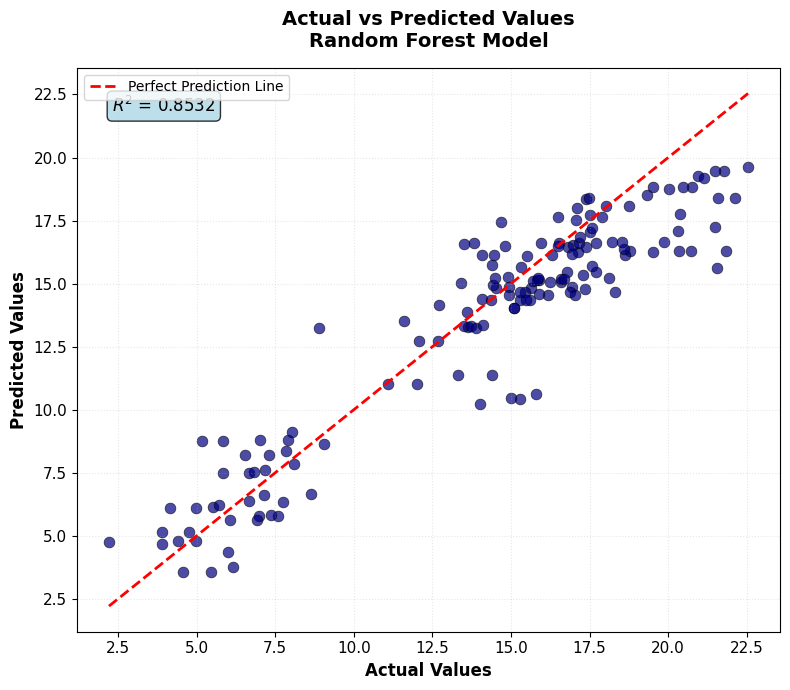

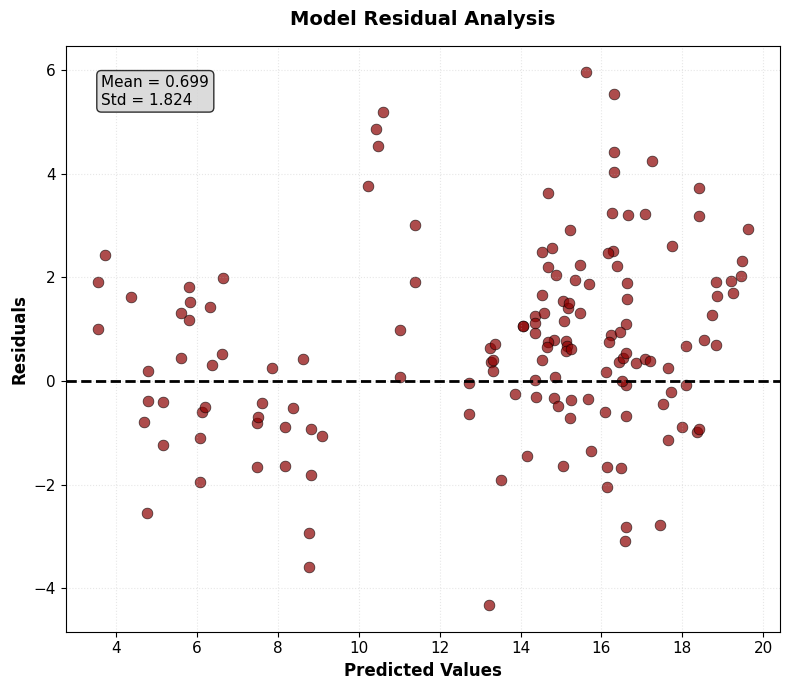

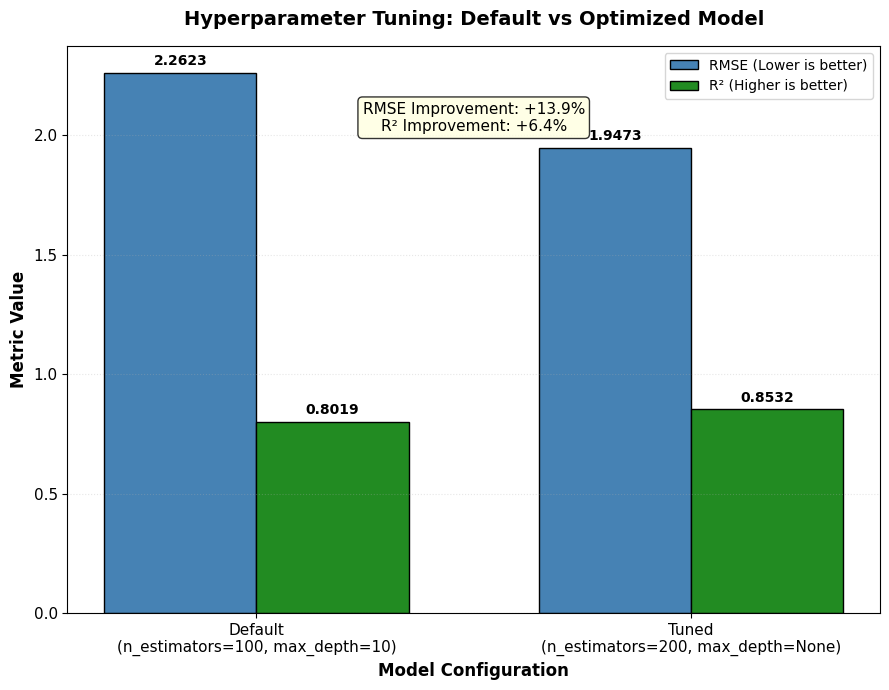

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# General font and style settings
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11

# Figure 1: Actual vs Predicted
plt.figure(figsize=(8, 7))

plt.scatter(y_test, y_test_pred, alpha=0.7, s=60, 
            color='navy', edgecolor='black', linewidth=0.5)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 
         'r--', linewidth=2, label='Perfect Prediction Line')

plt.xlabel('Actual Values', fontweight='bold')
plt.ylabel('Predicted Values', fontweight='bold')
plt.title('Actual vs Predicted Values\nRandom Forest Model', 
          fontweight='bold', pad=15)

plt.grid(True, alpha=0.3, linestyle=':')
plt.legend(loc='upper left')

r2_val = r2_score(y_test, y_test_pred)
plt.text(0.05, 0.95, f'$R^2$ = {r2_val:.4f}', 
         transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

# Figure 2: Residuals
plt.figure(figsize=(8, 7))

residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.7, s=60,
           color='darkred', edgecolor='black', linewidth=0.5)

plt.axhline(y=0, color='black', linestyle='--', linewidth=2)

plt.xlabel('Predicted Values', fontweight='bold')
plt.ylabel('Residuals', fontweight='bold')
plt.title('Model Residual Analysis', fontweight='bold', pad=15)

plt.grid(True, alpha=0.3, linestyle=':')

mean_res = residuals.mean()
std_res = residuals.std()
plt.text(0.05, 0.95, f'Mean = {mean_res:.3f}\nStd = {std_res:.3f}',
         transform=plt.gca().transAxes, fontsize=11,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Figure 3: Default vs Tuned Comparison
plt.figure(figsize=(9, 7))

models = ['Default', 'Tuned']
rmse_values = [default_rmse, test_rmse]
r2_values = [default_r2, test_r2]

x_pos = np.arange(len(models))
width = 0.35

bars1 = plt.bar(x_pos - width/2, rmse_values, width, 
               color='steelblue', edgecolor='black', 
               label='RMSE (Lower is better)')

bars2 = plt.bar(x_pos + width/2, r2_values, width, 
               color='forestgreen', edgecolor='black',
               label='R² (Higher is better)')

plt.xlabel('Model Configuration', fontweight='bold')
plt.ylabel('Metric Value', fontweight='bold')
plt.title('Hyperparameter Tuning: Default vs Optimized Model', 
          fontweight='bold', pad=15)

plt.xticks(x_pos, ['Default\n(n_estimators=100, max_depth=10)', 
                   'Tuned\n(n_estimators=200, max_depth=None)'])
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, linestyle=':', axis='y')

# Add values on top of bars
for bar, value in zip(bars1, rmse_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{value:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar, value in zip(bars2, r2_values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
             f'{value:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Calculate and show improvement percentages
rmse_improvement = ((default_rmse - test_rmse) / default_rmse) * 100
r2_improvement = ((test_r2 - default_r2) / abs(default_r2)) * 100

improvement_text = f'RMSE Improvement: {rmse_improvement:+.1f}%\nR² Improvement: {r2_improvement:+.1f}%'
plt.text(0.5, 0.85, improvement_text,
         transform=plt.gca().transAxes, ha='center', fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()